# Regression Analysis of Antiretroviral Services in Uganda by Subcounty Level, October-December 2024, and Creating a Cholopleth Map of % ART for USAID-funded Subcounties

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## First, I import data on ART services merged with subcounty population data. I create a new variable for the percentage of the subcounty reached by ART.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('uganda_art_with_pop_revised.csv')

In [5]:
df.head()

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,...,subcounty_ART_total,pct_art_pop_subcounty,usaid,cdc,dod,Subcounty,District,County,Subcounty Population,subcounty_pop_adjusted
0,Eastern Region,North East,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC Soroti Region,87041.0,CDC,l86BIz6pDzr,...,536.0,NaN,0,1,0,Usuk,Katakwi,Usuk,21224.0,21860.72
1,Eastern Region,North East,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC Soroti Region,87041.0,CDC,JXTSTKGSHxq,...,240.0,1.000000,0,1,0,Labori,Serere,Kasilo,19877.0,20473.31
2,Eastern Region,North East,IswqGyDbcgm,Amuria District,Abarilela Subcounty,Abarilela Health Centre III,AIC Soroti Region,87041.0,CDC,jj0VP3cAaCp,...,162.0,NaN,0,1,0,Abarilela,Amuria,Amuria,24290.0,25018.70
3,Eastern Region,North East,M864p5iRGub,Amuria District,Orungo Subcounty,Adakun Health Centre II,UPMB,84980.0,CDC,BPZNP5By5hb,...,0.0,NaN,0,1,0,Orungo,Amuria,Amuria,14758.0,15200.74
4,Central Region,Kampala,aWtkpwtp9JE,Kampala District,Central Division,Adventist Medical Centre,UPMB,84980.0,CDC,FuinxNi7q0E,...,19711.0,0.008168,0,1,0,Central Division,Kampala,KCCA,150336.0,154846.08


In [6]:
df.shape

(2179, 85)

In [7]:
df['pct_ART_subcounty'] = df['subcounty_ART_total'] / df['subcounty_pop_adjusted']

In [8]:
df.head()

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,...,pct_art_pop_subcounty,usaid,cdc,dod,Subcounty,District,County,Subcounty Population,subcounty_pop_adjusted,pct_ART_subcounty
0,Eastern Region,North East,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC Soroti Region,87041.0,CDC,l86BIz6pDzr,...,NaN,0,1,0,Usuk,Katakwi,Usuk,21224.0,21860.72,0.024519
1,Eastern Region,North East,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC Soroti Region,87041.0,CDC,JXTSTKGSHxq,...,1.000000,0,1,0,Labori,Serere,Kasilo,19877.0,20473.31,0.011723
2,Eastern Region,North East,IswqGyDbcgm,Amuria District,Abarilela Subcounty,Abarilela Health Centre III,AIC Soroti Region,87041.0,CDC,jj0VP3cAaCp,...,NaN,0,1,0,Abarilela,Amuria,Amuria,24290.0,25018.70,0.006475
3,Eastern Region,North East,M864p5iRGub,Amuria District,Orungo Subcounty,Adakun Health Centre II,UPMB,84980.0,CDC,BPZNP5By5hb,...,NaN,0,1,0,Orungo,Amuria,Amuria,14758.0,15200.74,0.000000
4,Central Region,Kampala,aWtkpwtp9JE,Kampala District,Central Division,Adventist Medical Centre,UPMB,84980.0,CDC,FuinxNi7q0E,...,0.008168,0,1,0,Central Division,Kampala,KCCA,150336.0,154846.08,0.127294


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df[df['usaid'] == 1].groupby('Subcounty')['pct_art_pop_subcounty'].sum()

Subcounty
Abako                1.0
Aber                 1.0
Abia                 1.0
Abim                 1.0
Abim Town Council    1.0
                    ... 
Wankole              1.0
West Division        1.0
Western Division     4.0
Wol                  1.0
Zesui                1.0
Name: pct_art_pop_subcounty, Length: 654, dtype: float64

In [11]:
df.sort_values(by='pct_ART_subcounty', ascending=False).head(50)

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total,pct_art_pop_subcounty,usaid,cdc,dod,Subcounty,District,County,Subcounty Population,subcounty_pop_adjusted,pct_ART_subcounty
1487,Eastern Region,East Central,aITcTSaL6bT,Jinja City,Jinja South Division,Jinja Main Prisons Health Centre III,UPS Follow-on,84974.0,CDC,kK5E7ivxmfM,aITcTSaL6bT,Jinja City,Jinja South Division,Jinja Main Prisons Health Centre III,UPS,84974,CDC,DSD,FY2025Q1,404,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,10.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,28.0,52.0,103.0,86.0,63.0,38.0,0.0,0.0,0.0,0.0,0.0,0,404,0,0,0,NaN,NaN,0,0,24,380,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,19493.0,0.020725,0,1,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597
1484,Eastern Region,East Central,BMmhOqlF4EB,Jinja City,Jinja South Division,Gaddafi Barracks Health Centre III,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,BMmhOqlF4EB,Jinja City,Jinja South Division,Gaddafi Barracks Health Centre III,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,334,0.0,0.0,1.0,0.0,1.0,7.0,6.0,16.0,25.0,29.0,21.0,22.0,7.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,13.0,19.0,41.0,46.0,38.0,19.0,5.0,1.0,0,0,0,0,0,NaN,NaN,2,1,25,14,NaN,NaN,0,2,80,76,NaN,NaN,0,0,37,97,19493.0,0.017134,0,0,1,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597
1492,Eastern Region,East Central,zK4jOLmfhz9,Jinja City,Jinja South Division,TASO Jinja,UPMB LSD,81995.0,USAID,mPqUq6eGDgJ,zK4jOLmfhz9,Jinja City,Jinja South Division,TASO Jinja,UPMB_LSD,81995,USAID,DSD,FY2025Q1,7082,0.0,0.0,4.0,19.0,58.0,80.0,147.0,207.0,245.0,140.0,556.0,992.0,903.0,712.0,507.0,338.0,0.0,1.0,6.0,29.0,31.0,67.0,70.0,76.0,90.0,351.0,208.0,109.0,349.0,323.0,250.0,214.0,0,0,0,0,0,NaN,NaN,5,6,33,84,NaN,NaN,47,37,460,204,NaN,NaN,29,24,4334,1819,19493.0,0.363310,1,0,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597
1489,Eastern Region,East Central,gOPqoaeHJKA,Jinja City,Jinja South Division,Kimaka Health Centre III,MJAP East Central,82000.0,USAID,bOfQQSBcxuU,gOPqoaeHJKA,Jinja City,Jinja South Division,Kimaka Health Centr

In [55]:
agency_mapping = {'USAID': 1, 'CDC': 2, 'DOD': 3}
df['Agency'] = df['PIRS US Agency'].map(agency_mapping)

In [12]:
usaid_pct_subcounty = df[df['usaid'] == 1].groupby(['District', 'Subcounty'])['pct_art_pop_subcounty'].sum().reset_index()

In [13]:
usaid_pct_subcounty = usaid_pct_subcounty.reset_index()

In [14]:
usaid_pct_subcounty

,index,District,Subcounty,pct_art_pop_subcounty
0,0,Budaka,Budaka,1.000000
1,1,Budaka,Budaka Town Council,1.000000
2,2,Budaka,Kameruka,1.000000
3,3,Budaka,Katiira,1.000000
4,4,Bududa,Bududa Town Council,1.000000
...,...,...,...,...
368,368,Tororo,Paya,1.000000
369,369,Tororo,Petta,1.000000
370,370,Tororo,Rubongi,0.193699
371,371,Tororo,Sop-Sop,1.000000


In [15]:
usaid_pct_subcounty['pct_usaid_subcounty'] = usaid_pct_subcounty['pct_art_pop_subcounty']

In [16]:
usaid_pct_subcounty = usaid_pct_subcounty.drop(columns='pct_art_pop_subcounty')

In [17]:
df = pd.merge(df, usaid_pct_subcounty, on=['District', 'Subcounty'], how='left')

In [63]:
df.sort_values(by='pct_ART_subcounty', ascending=False).head(30)

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total,pct_art_pop_subcounty,usaid,cdc,dod,Subcounty,District,County,Subcounty Population,subcounty_pop_adjusted,pct_ART_subcounty,index,pct_usaid_subcounty,Agency
1487,Eastern Region,East Central,aITcTSaL6bT,Jinja City,Jinja South Division,Jinja Main Prisons Health Centre III,UPS Follow-on,84974.0,CDC,kK5E7ivxmfM,aITcTSaL6bT,Jinja City,Jinja South Division,Jinja Main Prisons Health Centre III,UPS,84974,CDC,DSD,FY2025Q1,404,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,10.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,28.0,52.0,103.0,86.0,63.0,38.0,0.0,0.0,0.0,0.0,0.0,0,404,0,0,0,NaN,NaN,0,0,24,380,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,19493.0,0.020725,0,1,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,2.0
1484,Eastern Region,East Central,BMmhOqlF4EB,Jinja City,Jinja South Division,Gaddafi Barracks Health Centre III,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,BMmhOqlF4EB,Jinja City,Jinja South Division,Gaddafi Barracks Health Centre III,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,334,0.0,0.0,1.0,0.0,1.0,7.0,6.0,16.0,25.0,29.0,21.0,22.0,7.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,13.0,19.0,41.0,46.0,38.0,19.0,5.0,1.0,0,0,0,0,0,NaN,NaN,2,1,25,14,NaN,NaN,0,2,80,76,NaN,NaN,0,0,37,97,19493.0,0.017134,0,0,1,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,3.0
1492,Eastern Region,East Central,zK4jOLmfhz9,Jinja City,Jinja South Division,TASO Jinja,UPMB LSD,81995.0,USAID,mPqUq6eGDgJ,zK4jOLmfhz9,Jinja City,Jinja South Division,TASO Jinja,UPMB_LSD,81995,USAID,DSD,FY2025Q1,7082,0.0,0.0,4.0,19.0,58.0,80.0,147.0,207.0,245.0,140.0,556.0,992.0,903.0,712.0,507.0,338.0,0.0,1.0,6.0,29.0,31.0,67.0,70.0,76.0,90.0,351.0,208.0,109.0,349.0,323.0,250.0,214.0,0,0,0,0,0,NaN,NaN,5,6,33,84,NaN,NaN,47,37,460,204,NaN,NaN,29,24,4334,1819,19493.0,0.363310,1,0,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,1.0
1489,Eastern Region,East Central,gOPqoaeHJKA,Jinja City,Jinja South Division,Kimaka Health Centre III,MJAP East Central,82000.0,USAID,bOfQQS

### 8 out of 10 of the subcounties with the highest % of population accessing ART are funded by USAID.

In [75]:
df[df['usaid'] == 1].sort_values(by='pct_ART_subcounty', ascending=False).head(30)

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total,pct_art_pop_subcounty,usaid,cdc,dod,Subcounty,District,County,Subcounty Population,subcounty_pop_adjusted,pct_ART_subcounty,index,pct_usaid_subcounty,Agency
1491,Eastern Region,East Central,MW38DjLdTg7,Jinja City,Jinja South Division,Muwumba Health Centre III,MJAP East Central,82000.0,USAID,GLGnUIlcnIv,MW38DjLdTg7,Jinja City,Jinja South Division,Muwumba Health Centre III,MJAP_East Central Region,82000,USAID,DSD,FY2025Q1,230,0.0,0.0,1.0,0.0,2.0,2.0,6.0,18.0,24.0,24.0,21.0,23.0,15.0,6.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,4.0,4.0,15.0,14.0,11.0,14.0,9.0,3.0,3.0,0,0,0,0,0,NaN,NaN,1,1,17,3,NaN,NaN,0,0,10,2,NaN,NaN,2,1,117,76,19493.0,0.011799,1,0,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,1.0
1488,Eastern Region,East Central,SZS6IdnTKZR,Jinja City,Jinja South Division,Jinja Regional Referral Hospital,G2G Jinja,160728.0,USAID,abQyYyzW2ae,SZS6IdnTKZR,Jinja City,Jinja South Division,Jinja Regional Referral Hospital,G2G Jinja,160728,USAID,DSD,FY2025Q1,4675,0.0,0.0,31.0,47.0,64.0,82.0,145.0,315.0,453.0,510.0,499.0,395.0,356.0,174.0,125.0,63.0,0.0,1.0,28.0,41.0,57.0,63.0,60.0,65.0,98.0,174.0,175.0,191.0,188.0,134.0,67.0,74.0,0,0,7,0,0,NaN,NaN,42,34,405,151,NaN,NaN,97,93,307,98,NaN,NaN,3,0,2405,1040,19493.0,0.239830,1,0,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,1.0
1493,Eastern Region,East Central,E2mdeU0lkNe,Jinja City,Jinja South Division,Walukuba Health Centre IV,MJAP East Central,82000.0,USAID,jQwDTmeHxYZ,E2mdeU0lkNe,Jinja City,Jinja South Division,Walukuba Health Centre IV,MJAP_East Central Region,82000,USAID,DSD,FY2025Q1,1015,0.0,0.0,1.0,2.0,11.0,11.0,22.0,89.0,126.0,116.0,112.0,75.0,60.0,44.0,21.0,15.0,0.0,0.0,0.0,5.0,6.0,6.0,3.0,11.0,23.0,46.0,53.0,49.0,45.0,38.0,16.0,9.0,0,0,0,0,0,NaN,NaN,1,1,64,21,NaN,NaN,10,10,238,94,NaN,NaN,3,0,389,184,19493.0,0.052070,1,0,0,Jinja South Division,NaN,NaN,21467.0,22111.01,0.881597,NaN,0.0,1.0
1490,Eastern Region,East Central,pAsdJsJETch,Jinja City,Jinja Sou

In [19]:
df.shape

(2179, 88)

In [20]:
df['pct_usaid_subcounty'] = df['pct_usaid_subcounty'].fillna(0)

In [57]:
df.to_csv('uganda_art_with_usaid_pct.csv', index=False)

## Exploratory data visualization and calculations

In [58]:
%%R

df <- read.csv('uganda_art_with_usaid_pct.csv')

In [23]:
%%R

library(ggplot2)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 217 rows containing missing values or values outside the scale range
(`geom_point()`). 



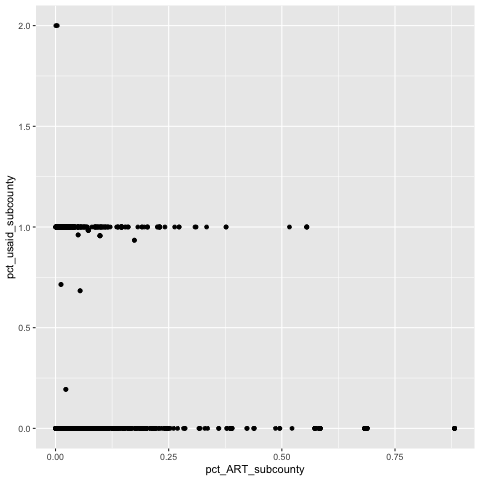

In [24]:
%%R

    ggplot(df) +
    aes(x=pct_ART_subcounty, y=pct_usaid_subcounty) + 
    geom_point()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 217 rows containing missing values or values outside the scale range
(`geom_point()`). 



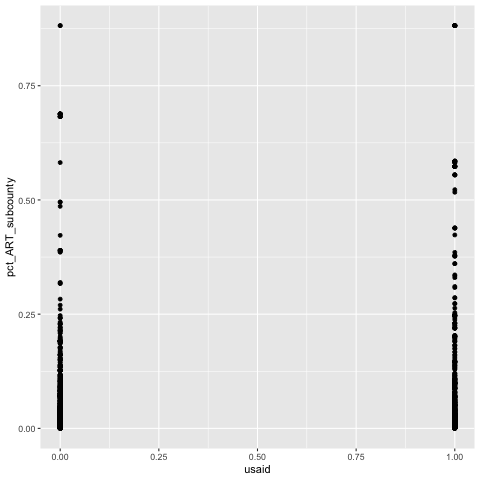

In [54]:
%%R

    ggplot(df) +
    aes(x=usaid, y=pct_ART_subcounty) + 
    geom_point()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 218 rows containing missing values or values outside the scale range
(`geom_point()`). 



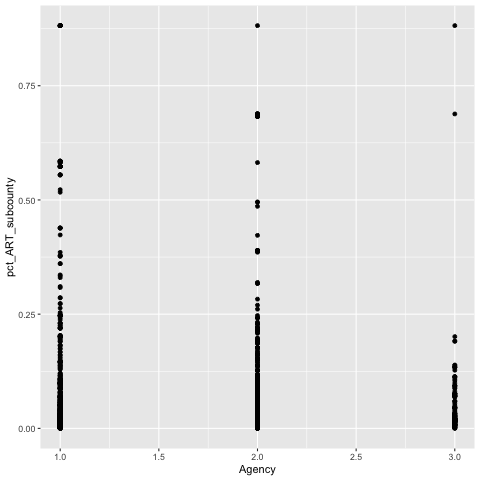

In [59]:
%%R

    ggplot(df) +
    aes(x=Agency, y=pct_ART_subcounty) + 
    geom_point()

In [25]:
df[df['usaid'] == 1]['pct_ART_subcounty'].mean()

0.07929438559070932

In [26]:
df[df['usaid'] == 0]['pct_ART_subcounty'].mean()

0.05688616320040802

In [27]:
df[df['cdc'] == 1]['pct_ART_subcounty'].mean()

0.05821430640097873

In [28]:
df[df['cdc'] == 0]['pct_ART_subcounty'].mean()

0.07428427039818408

In [29]:
df[df['dod'] == 1]['pct_ART_subcounty'].mean()

0.049173331601912985

In [30]:
df[df['dod'] == 0]['pct_ART_subcounty'].mean()

0.067979688297335

In [31]:
df[df['usaid'] == 1]['pct_ART_subcounty'].median()

0.02379283479429481

In [32]:
df[df['usaid'] == 0]['pct_ART_subcounty'].median()

0.02475354777803489

In [33]:
df[df['cdc'] == 1]['pct_ART_subcounty'].median()

0.02549296444452885

In [34]:
df[df['cdc'] == 0]['pct_ART_subcounty'].median()

0.02284988117449038

In [35]:
df[df['dod'] == 1]['pct_ART_subcounty'].median()

0.0206011102687633

In [36]:
df[df['dod'] == 0]['pct_ART_subcounty'].median()

0.024866298306915408

## Statistical Regressions (Linear and Logistic)

In [46]:
%%R

require('tidyverse')
require('DescTools')

In [47]:
%%R -i df
model <- lm(pct_ART_subcounty ~ pct_usaid_subcounty, data=df)
summary(model)


Call:
lm(formula = pct_ART_subcounty ~ pct_usaid_subcounty, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07314 -0.05685 -0.03787 -0.00171  0.80846 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.073138   0.003193  22.905  < 2e-16 ***
pct_usaid_subcounty -0.026344   0.006294  -4.186 2.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1221 on 1960 degrees of freedom
  (217 observations deleted due to missingness)
Multiple R-squared:  0.00886,	Adjusted R-squared:  0.008354 
F-statistic: 17.52 on 1 and 1960 DF,  p-value: 2.967e-05



In [48]:
%%R -i df
logistic <- glm(usaid ~ pct_ART_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = usaid ~ pct_ART_subcounty, family = "binomial", 
    data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.40601    0.05239  -7.749 9.25e-15 ***
pct_ART_subcounty  1.49602    0.38452   3.891 1.00e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2674.5  on 1961  degrees of freedom
Residual deviance: 2658.6  on 1960  degrees of freedom
  (217 observations deleted due to missingness)
AIC: 2662.6

Number of Fisher Scoring iterations: 4



In [49]:
%%R

PseudoR2(logistic, which='McFadden')

   McFadden 
0.005943238 


In [50]:
%%R -i df
logistic <- glm(cdc ~ pct_ART_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = cdc ~ pct_ART_subcounty, family = "binomial", data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        0.03802    0.05163   0.736  0.46149   
pct_ART_subcounty -1.10898    0.38785  -2.859  0.00425 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2719.3  on 1961  degrees of freedom
Residual deviance: 2710.7  on 1960  degrees of freedom
  (217 observations deleted due to missingness)
AIC: 2714.7

Number of Fisher Scoring iterations: 4



In [51]:
%%R

PseudoR2(logistic, which='McFadden')

   McFadden 
0.003158486 


In [52]:
%%R -i df
logistic <- glm(dod ~ pct_ART_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = dod ~ pct_ART_subcounty, family = "binomial", data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.28087    0.09387  -24.30   <2e-16 ***
pct_ART_subcounty -1.75182    0.94198   -1.86   0.0629 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1137.5  on 1961  degrees of freedom
Residual deviance: 1133.1  on 1960  degrees of freedom
  (217 observations deleted due to missingness)
AIC: 1137.1

Number of Fisher Scoring iterations: 5



In [53]:
%%R

PseudoR2(logistic, which='McFadden')

   McFadden 
0.003884283 


### USAID funding in a subcounty is associated with a higher % of the population that accesses ART services. CDC and DOD funding are not.

# Creating a Choropleth Map of the % ART Variable for USAID-funded Subcounties

In [64]:
%%R

library(dplyr)
library(sf) 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


In [65]:
%%R

subcounties <- sf::st_read("uga_admbnda_adm4_ubos_20200824.geojson")

Reading layer `uga_admbnda_adm4_ubos_20200824' from data source 
  `/Users/annikamcginnis/Documents/Data Studio/project-5/uga_admbnda_adm4_ubos_20200824.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1520 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 29.57216 ymin: -1.481474 xmax: 35.00105 ymax: 4.231367
Geodetic CRS:  WGS 84


In [66]:
%%R

colnames(df)

 [1] "Statistical.Region"                                                     
 [2] "UAIS.2011_.Region"                                                      
 [3] "PIRS.UnitID"                                                            
 [4] "PIRS.District"                                                          
 [5] "PIRS.Subcounty"                                                         
 [6] "PIRS.Service.outlet"                                                    
 [7] "PIRS.Mechanism.name"                                                    
 [8] "pirs.Mechanism.ID"                                                      
 [9] "PIRS.US.Agency"                                                         
[10] "DATIM.ID"                                                               
[11] "DHIS2.ID"                                                               
[12] "DHIS2.District"                                                         
[13] "DHIS2.Subcounty"                              

In [73]:
%%R

art_geo <- subcounties %>%
  left_join(df, by = c("ADM4_EN" = "PIRS.Subcounty"))

In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1325 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


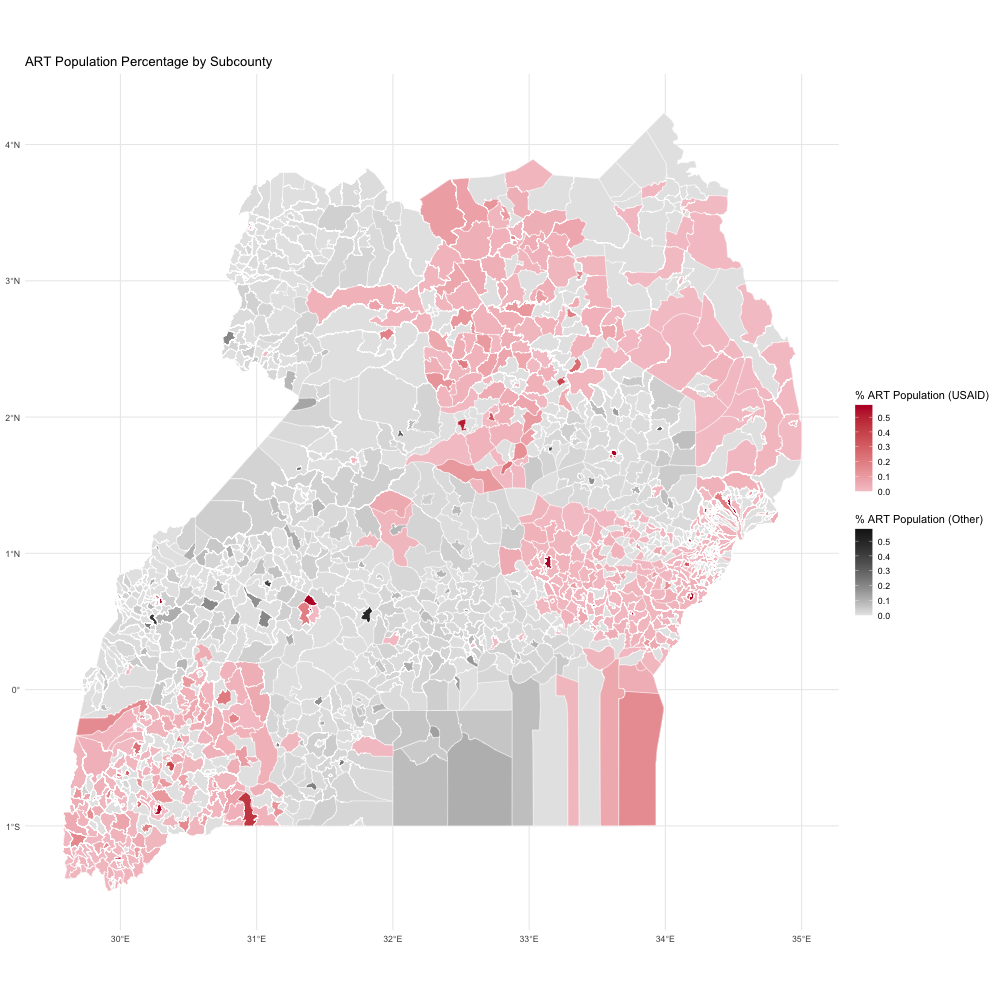

In [74]:
%%R -h 1000 -w 1000

library(ggplot2)
library(ggnewscale)
library(dplyr)
library(sf)

art_map =
# Base map with white borders around all subcounties
ggplot() +
  # 1. Plot all subcounties with NA fill — as a background layer
  geom_sf(data = art_geo, fill = "grey90", color = "white", size = 0.2) +

  # 2. Plot non-USAID subcounties with grayscale fill (where data exists)
  geom_sf(
    data = art_geo %>% filter(usaid != 1 & !is.na(pct_ART_subcounty)),
    aes(fill = pct_ART_subcounty),
    color = "white", size = 0.2
  ) +
  scale_fill_gradient(
    name = "% ART Population (Other)",
    low = "grey90", high = "grey10"
  ) +

  ggnewscale::new_scale_fill() +

  # 3. Plot USAID subcounties with red fill (where data exists)
  geom_sf(
    data = art_geo %>% filter(usaid == 1 & !is.na(pct_ART_subcounty)),
    aes(fill = pct_ART_subcounty),
    color = "white", size = 0.2
  ) +
  scale_fill_gradient(
    name = "% ART Population (USAID)",
    low = "#f5c7cd", high = "#ba0c2f"
  ) +

  theme_minimal() +
  labs(title = "ART Population Percentage by Subcounty") +
  theme(legend.position = "right")

ggsave("art_map.svg", art_map, width = 10, height = 10, units = "in", device = "svg")
art_map